In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


In [2]:
# Load all seven IoT device datasets
fridge = pd.read_csv("data/raw/Train_Test_IoT_Fridge.csv")
thermostat = pd.read_csv("data/raw/Train_Test_IoT_Thermostat.csv")
garage = pd.read_csv("data/raw/Train_Test_IoT_Garage_Door.csv")
gps = pd.read_csv("data/raw/Train_Test_IoT_GPS_Tracker.csv")
motion = pd.read_csv("data/raw/Train_Test_IoT_Motion_Light.csv")
modbus = pd.read_csv("data/raw/Train_Test_IoT_Modbus.csv")
weather = pd.read_csv("data/raw/Train_Test_IoT_Weather.csv")

print("Loaded datasets:")
for name, df in {
    "Fridge": fridge, "Thermostat": thermostat, "Garage": garage,
    "GPS": gps, "Motion": motion, "Modbus": modbus, "Weather": weather
}.items():
    print(f"{name:12s}: {df.shape[0]:>8,} rows × {df.shape[1]} cols")


Loaded datasets:
Fridge      :   59,944 rows × 7 cols
Thermostat  :   52,774 rows × 7 cols
Garage      :   59,587 rows × 7 cols
GPS         :   58,960 rows × 7 cols
Motion      :   59,488 rows × 7 cols
Modbus      :   51,106 rows × 9 cols
Weather     :   59,260 rows × 8 cols


In [3]:
fridge.info()
fridge.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59944 entries, 0 to 59943
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ts                  59944 non-null  int64  
 1   date                59944 non-null  object 
 2   time                59944 non-null  object 
 3   fridge_temperature  59944 non-null  float64
 4   temp_condition      59944 non-null  object 
 5   label               59944 non-null  int64  
 6   type                59944 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ MB


ts       date        time  fridge_temperature temp_condition  label  type
0  1556245180  25-Apr-19   19:19:40                 9.00           high      1  ddos
1  1556245180  25-Apr-19   19:19:40                 9.25           high      1  ddos
2  1556245185  25-Apr-19   19:19:45                12.65           high      1  ddos
3  1556245185  25-Apr-19   19:19:45                 4.65            low      1  ddos
4  1556245195  25-Apr-19   19:19:55                12.65           high      1  ddos

In [4]:
fridge.isna().sum()
fridge.describe(include="all").T

count unique             top   freq               mean             std           min  \
ts                  59944.0    NaN             NaN    NaN  1555034269.063976  1101367.085183  1554061012.0   
date                  59944      8       31-Mar-19  23174                NaN             NaN           NaN   
time                  59944  18106     04:07:11       115                NaN             NaN           NaN   
fridge_temperature  59944.0    NaN             NaN    NaN           7.131876        3.619223           1.0   
temp_condition        59944      6           high   14038                NaN             NaN           NaN   
label               59944.0    NaN             NaN    NaN           0.416122        0.492918           0.0   
type                  59944      7          normal  35000                NaN             NaN           NaN   

                             25%           50%           75%           max  
ts                  1554061396.0  1554203067.0  1556246386.0  1556525588.0  
date                         NaN           NaN           NaN           NaN  
time                         NaN           NaN           NaN           NaN  
fridge_temperature           4.2           6.7         10.25          14.0  
temp_condition               NaN           NaN           NaN           NaN  
label                        0.0           0.0           1.0           1.0  
type                         NaN           NaN           NaN           NaN

In [5]:
datasets = [fridge, thermostat, garage, gps, motion, modbus, weather]
names = ["Fridge", "Thermostat", "Garage", "GPS", "Motion", "Modbus", "Weather"]

for name, df in zip(names, datasets):
    print(f"\n{name} — rows:{df.shape[0]}, cols:{df.shape[1]}")
    print(df.isna().sum().sum(), "missing values total")
    print("Columns:", df.columns.tolist())



Fridge — rows:59944, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'fridge_temperature', 'temp_condition', 'label', 'type']

Thermostat — rows:52774, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'current_temperature', 'thermostat_status', 'label', 'type']

Garage — rows:59587, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'door_state', 'sphone_signal', 'label', 'type']

GPS — rows:58960, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'latitude', 'longitude', 'label', 'type']

Motion — rows:59488, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'motion_status', 'light_status', 'label', 'type']

Modbus — rows:51106, cols:9
0 missing values total
Columns: ['ts', 'date', 'time', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'label', 'type']

Weather — rows:59260, cols:8
0 missing values total
Columns: ['ts', 'date', 'time', 'temperature', 'pressure', 'humidit

In [6]:
def clean_df(df, device_name):
    df = df.copy()
    drop_cols = [c for c in df.columns if c.lower() in ["ts", "date", "time", "type"]]
    df.drop(columns=drop_cols, inplace=True, errors="ignore")

    # Trim text whitespace and lowercase for all object columns
    for c in df.select_dtypes(include="object"):
        df[c] = df[c].astype(str).str.strip().str.lower()

    df["device"] = device_name.lower()
    return df

fridge = clean_df(fridge, "Fridge")
thermostat = clean_df(thermostat, "Thermostat")
garage = clean_df(garage, "Garage_Door")
gps = clean_df(gps, "GPS_Tracker")
motion = clean_df(motion, "Motion_Light")
modbus = clean_df(modbus, "Modbus")
weather = clean_df(weather, "Weather")


In [7]:
df_all = pd.concat(
    [fridge, thermostat, garage, gps, motion, modbus, weather],
    ignore_index=True
)

print("Unified dataset shape:", df_all.shape)
df_all.head()


Unified dataset shape: (401119, 19)


fridge_temperature temp_condition  label  device  current_temperature  thermostat_status door_state sphone_signal  \
0                9.00           high      1  fridge                  NaN                NaN        NaN           NaN   
1                9.25           high      1  fridge                  NaN                NaN        NaN           NaN   
2               12.65           high      1  fridge                  NaN                NaN        NaN           NaN   
3                4.65            low      1  fridge                  NaN                NaN        NaN           NaN   
4               12.65           high      1  fridge                  NaN                NaN        NaN           NaN   

   latitude  longitude  motion_status light_status  FC1_Read_Input_Register  FC2_Read_Discrete_Value  \
0       NaN        NaN            NaN          NaN                      NaN                      NaN   
1       NaN        NaN            NaN          NaN                      NaN                      NaN   
2       NaN        NaN            NaN          NaN                      NaN                      NaN   
3       NaN        NaN            NaN          NaN                      NaN                      NaN   
4       NaN        NaN            NaN          NaN                      NaN                      NaN   

   FC3_Read_Holding_Register  FC4_Read_Coil  temperature  pressure  humidity  
0                        NaN            NaN          NaN       NaN       NaN  
1                        NaN            NaN          NaN       NaN       NaN  
2                        NaN            NaN          NaN       NaN       NaN  
3                        NaN            NaN          NaN       NaN       NaN  
4                        NaN            NaN          NaN       NaN       NaN

In [8]:
print("Columns:", df_all.columns.tolist())
print("\nLabel distribution:")
print(df_all["label"].value_counts(normalize=True))


Columns: ['fridge_temperature', 'temp_condition', 'label', 'device', 'current_temperature', 'thermostat_status', 'door_state', 'sphone_signal', 'latitude', 'longitude', 'motion_status', 'light_status', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'temperature', 'pressure', 'humidity']

Label distribution:
label
0    0.610791
1    0.389209
Name: proportion, dtype: float64


In [9]:
for c in df_all.columns:
    if df_all[c].dtype == "object":
        print(c, "→", df_all[c].nunique(), "unique values")


temp_condition → 2 unique values
device → 7 unique values
door_state → 2 unique values
sphone_signal → 4 unique values
light_status → 2 unique values


In [10]:
numeric_cols = df_all.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_all.select_dtypes(exclude=np.number).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['fridge_temperature', 'label', 'current_temperature', 'thermostat_status', 'latitude', 'longitude', 'motion_status', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'temperature', 'pressure', 'humidity']
Categorical columns: ['temp_condition', 'device', 'door_state', 'sphone_signal', 'light_status']


In [11]:
df_all.to_csv("artifacts/processed/ton_iot_cleaned.csv", index=False)
print("Saved cleaned dataset.")


Saved cleaned dataset.


Top 10 features ranked by mutual information:

                      Feature  Mutual_Info_Score
11                   pressure           0.089408
12                   humidity           0.081991
4                   longitude           0.065077
3                    latitude           0.063295
9               FC4_Read_Coil           0.061664
7     FC2_Read_Discrete_Value           0.061617
6     FC1_Read_Input_Register           0.060695
8   FC3_Read_Holding_Register           0.059063
23            sphone_signal_0           0.055950
25        sphone_signal_false           0.043627


/var/folders/f0/w8v9xsrn0y37lfg015l1vlxr0000gn/T/ipykernel_58181/1554729231.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


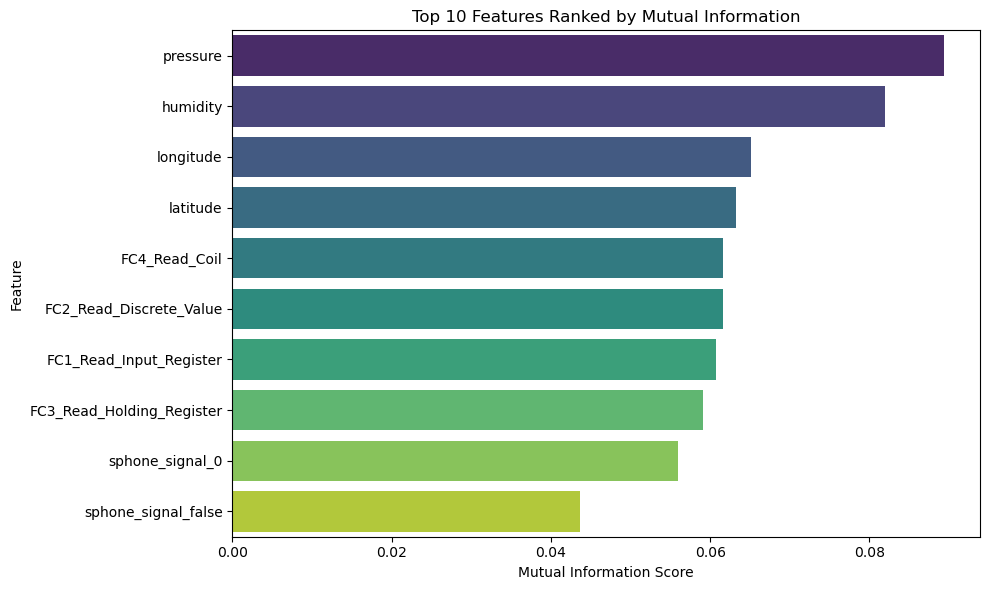

In [12]:
# ============================================================
# Cell 11 — Feature Selection: Mutual Information (SelectKBest)
# ============================================================

from sklearn.feature_selection import SelectKBest, mutual_info_classif
import seaborn as sns

# 1. Prepare data
# We'll drop rows with NaN for simplicity when computing MI
df_fs = df_all.copy().dropna(subset=['label']).fillna(0)

# Separate features and labels
X = df_fs.drop(columns=['label'])
y = df_fs['label']

# Encode categorical columns using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Apply SelectKBest with Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_encoded, y)

# Create DataFrame of scores
mi_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Mutual_Info_Score': selector.scores_
}).sort_values(by='Mutual_Info_Score', ascending=False)

# Display top features
print("Top 10 features ranked by mutual information:\n")
print(mi_scores.head(10))

# 3. Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Mutual_Info_Score', 
    y='Feature', 
    data=mi_scores.head(10), 
    palette='viridis'
)
plt.title('Top 10 Features Ranked by Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import pandas as pd

assert "label" in df_all.columns
X = df_all.drop(columns=["label"])
y = df_all["label"].astype(int)

numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

print(f"Total rows: {len(df_all):,}")
print(f"X shape: {X.shape}  |  y shape: {y.shape}")
print(f"Numeric features: {len(numeric_cols)}  |  Categorical features: {len(categorical_cols)}")
print("Label balance (overall):", y.value_counts(normalize=True).round(3).to_dict())


Total rows: 401,119
X shape: (401119, 18)  |  y shape: (401119,)
Numeric features: 13  |  Categorical features: 5
Label balance (overall): {0: 0.611, 1: 0.389}


In [14]:
from sklearn.model_selection import train_test_split
from pathlib import Path

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Train: {X_train.shape} | Test: {X_test.shape}")
print("Label balance (train):", y_train.value_counts(normalize=True).round(3).to_dict())
print("Label balance (test) :", y_test.value_counts(normalize=True).round(3).to_dict())

out_dir = Path("artifacts/processed"); out_dir.mkdir(parents=True, exist_ok=True)
X_train.to_csv(out_dir/"X_train_raw.csv", index=False)
X_test.to_csv(out_dir/"X_test_raw.csv", index=False)
y_train.to_frame("label").to_csv(out_dir/"y_train.csv", index=False)
y_test.to_frame("label").to_csv(out_dir/"y_test.csv", index=False)
print(f"Saved train/test splits to {out_dir.resolve()}")


Train: (320895, 18) | Test: (80224, 18)
Label balance (train): {0: 0.611, 1: 0.389}
Label balance (test) : {0: 0.611, 1: 0.389}
Saved train/test splits to /Users/chris/keele/ton-iot-ids/artifacts/processed


In [15]:
# ==== Shared setup: preprocessing, CV, and metrics (run once) ====
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.metrics import classification_report, confusion_matrix

# --- Folders for outputs (figures/metrics later) ---
ARTIFACTS = Path("artifacts"); ARTIFACTS.mkdir(exist_ok=True)
FIGS = ARTIFACTS / "figures"; FIGS.mkdir(parents=True, exist_ok=True)
METRICS = ARTIFACTS / "metrics"; METRICS.mkdir(parents=True, exist_ok=True)

# --- Column buckets from earlier cells ---
# Assumes you already defined numeric_cols and categorical_cols, and have X_train/X_test, y_train/y_test.
print(f"Numeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

# --- Preprocessing: identical for every model ---
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, numeric_cols),
        ("cat", categorical_tf, categorical_cols),
    ],
    remainder="drop"
)

# --- Cross-validation (shared by all models) ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("CV:", cv)

# --- Scoring helpers (we’ll use these consistently) ---
def compute_binary_metrics(y_true, y_pred, y_proba=None):
    """Return a dict of core binary classification metrics."""
    out = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_macro": precision_score(y_true, y_pred, average="macro", zero_division=0),
        "recall_macro": recall_score(y_true, y_pred, average="macro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
    }
    if y_proba is not None:
        # y_proba should be the probability of the positive class (shape (n_samples,))
        # or a 2D array [:,1]; we’ll standardize later per model.
        try:
            out["roc_auc"] = roc_auc_score(y_true, y_proba)
        except Exception:
            out["roc_auc"] = np.nan
    else:
        out["roc_auc"] = np.nan
    return out

print("Setup complete: preprocess, CV, and metric helper ready.")


Numeric features: 13
Categorical features: 5
CV: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Setup complete: preprocess, CV, and metric helper ready.


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best params: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 2, 'clf__n_estimators': 400}
Best CV macro-F1 (3-fold): 0.7536

=== Test metrics (Random Forest, tree-encoding) ===
accuracy: 0.7636
precision_macro: 0.7722
recall_macro: 0.7850
f1_macro: 0.7622
roc_auc: 0.8897

Classification report:
              precision    recall  f1-score   support

           0     0.9012    0.6885    0.7806     49000
           1     0.6432    0.8815    0.7438     31224

    accuracy                         0.7636     80224
   macro avg     0.7722    0.7850    0.7622     80224
weighted avg     0.8008    0.7636    0.7663     80224



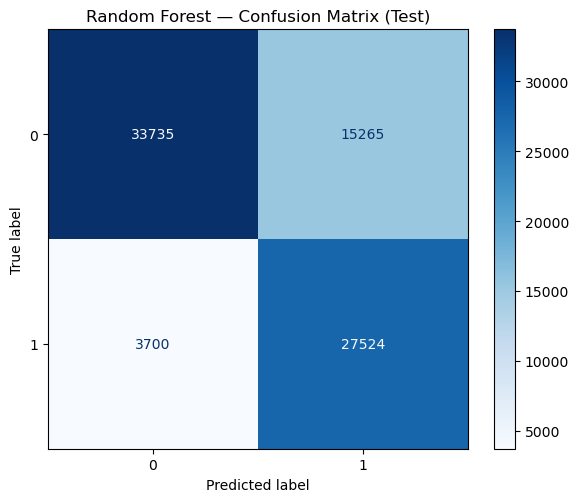

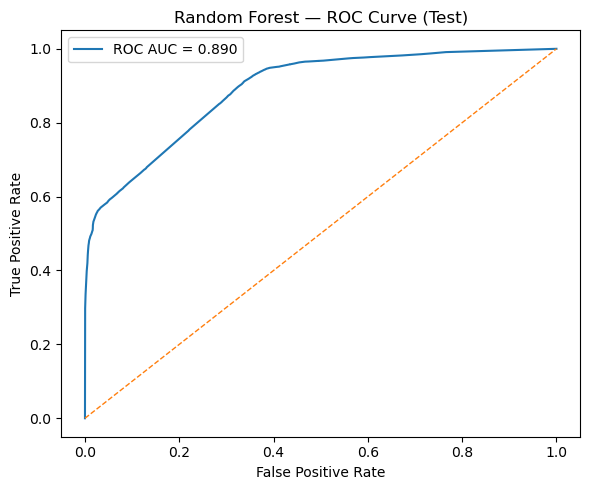

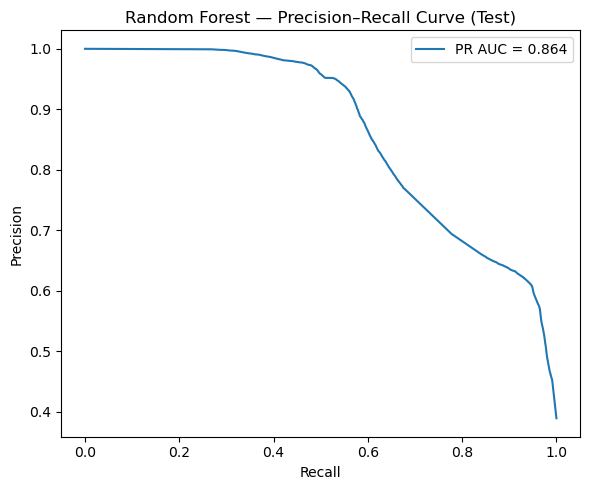


Saved model → artifacts/models/best_random_forest_treeenc.joblib
Saved metrics → artifacts/metrics/rf_treeenc_metrics.json


In [17]:
# ==== Model 1 (revised): Random Forest with tree-friendly encoding ====
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, precision_recall_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import json, joblib
from pathlib import Path

# 0) CV: use a lighter 3-fold for tuning to reduce memory/CPU load
cv_light = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1) Tree-friendly preprocessing:
#    - numeric: median impute (no scaling needed for trees)
#    - categorical: most-frequent impute + ordinal encode (compact, no one-hot blowup)
numeric_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
categorical_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocess_tree = ColumnTransformer(
    transformers=[
        ("num", numeric_tf_tree, numeric_cols),
        ("cat", categorical_tf_tree, categorical_cols),
    ],
    remainder="drop"
)

# 2) Define model and pipeline
rf_clf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # mild help with class imbalance
)
rf_pipe = Pipeline(steps=[("prep", preprocess_tree), ("clf", rf_clf)])

# 3) Smaller, sensible grid (kept compact for stability)
rf_param_grid = {
    "clf__n_estimators": [200, 400],
    "clf__max_depth": [None, 20],
    "clf__max_features": ["sqrt"],
    "clf__min_samples_split": [2, 5],
}

# 4) Grid search (use n_jobs=1 to avoid multiple concurrent fits -> lower memory pressure)
rf_grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    scoring="f1_macro",
    cv=cv_light,
    n_jobs=1,       # IMPORTANT: prevents parallel fold fits that can blow memory
    refit=True,
    verbose=1,
)

# 5) Fit on training data
rf_grid.fit(X_train, y_train)

print("\nBest params:", rf_grid.best_params_)
print("Best CV macro-F1 (3-fold):", f"{rf_grid.best_score_:.4f}")

# 6) Evaluate on the held-out test set
best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(X_test)

# Probabilities for ROC/PR (RandomForest supports predict_proba)
y_proba = None
try:
    y_proba = best_rf.predict_proba(X_test)[:, 1]
except Exception:
    pass

metrics = compute_binary_metrics(y_test, y_pred, y_proba)
print("\n=== Test metrics (Random Forest, tree-encoding) ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# 7) Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title("Random Forest — Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 8) ROC and PR curves (if probabilities available)
if y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], "--", lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest — ROC Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    plt.figure(figsize=(6, 5))
    plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Random Forest — Precision–Recall Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 9) Persist artefacts
MODELS = Path("artifacts/models"); MODELS.mkdir(parents=True, exist_ok=True)
METRICS = Path("artifacts/metrics"); METRICS.mkdir(parents=True, exist_ok=True)

joblib.dump(best_rf, MODELS / "best_random_forest_treeenc.joblib")
with open(METRICS / "rf_treeenc_metrics.json", "w") as f:
    json.dump(
        {
            "best_params": rf_grid.best_params_,
            "cv_macro_f1_3fold": float(rf_grid.best_score_),
            "test_metrics": {k: (float(v) if isinstance(v, (int, float, np.floating)) else v) for k, v in metrics.items()},
        },
        f,
        indent=2,
    )

print("\nSaved model → artifacts/models/best_random_forest_treeenc.joblib")
print("Saved metrics → artifacts/metrics/rf_treeenc_metrics.json")


scale_pos_weight (neg/pos): 1.569
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/opt/anaconda3/envs/tf/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:14:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:14:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:14:33] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda


Best params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 8, 'clf__n_estimators': 600, 'clf__reg_lambda': 1.0, 'clf__scale_pos_weight': 1.5693182273109412, 'clf__subsample': 0.8}
Best CV macro-F1 (3-fold): 0.7250

=== Test metrics (XGBoost, tree-encoding) ===
accuracy: 0.7326
precision_macro: 0.7332
recall_macro: 0.7453
f1_macro: 0.7295
roc_auc: 0.8576

Classification report:
              precision    recall  f1-score   support

           0     0.8453    0.6882    0.7587     49000
           1     0.6212    0.8023    0.7002     31224

    accuracy                         0.7326     80224
   macro avg     0.7332    0.7453    0.7295     80224
weighted avg     0.7581    0.7326    0.7359     80224



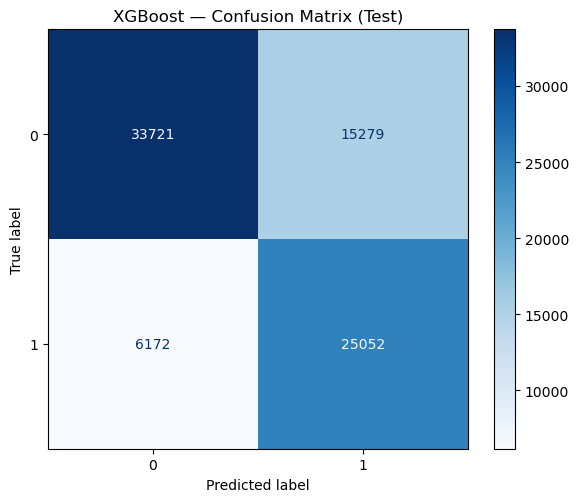

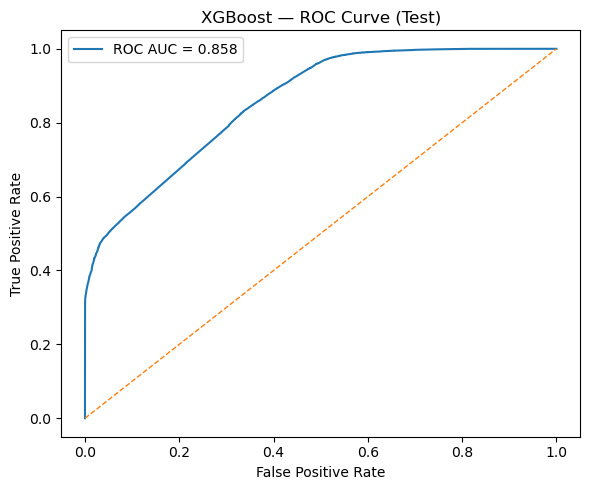

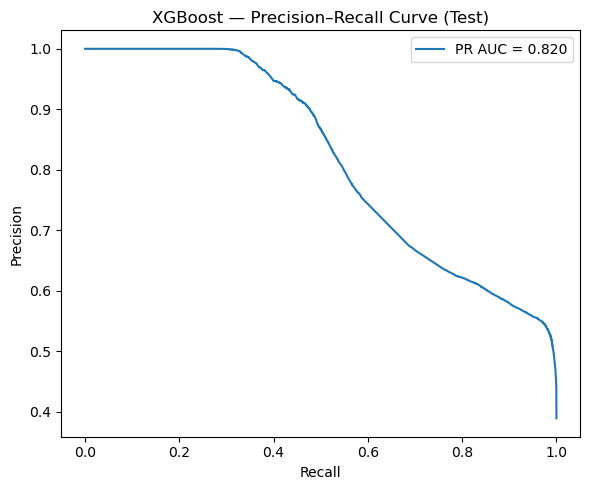


Saved model → artifacts/models/best_xgboost_treeenc.joblib
Saved metrics → artifacts/metrics/xgb_treeenc_metrics.json


In [19]:
# ==== Model 2: XGBoost — pipeline, tuning, evaluation (tree-friendly encoding) ====
import numpy as np
import json, joblib
import matplotlib.pyplot as plt
from pathlib import Path

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, precision_recall_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# 0) Light CV for tuning (match RF)
cv_light = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1) Tree-friendly preprocessing (reuse pattern from RF)
numeric_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
categorical_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocess_tree = ColumnTransformer(
    transformers=[
        ("num", numeric_tf_tree, numeric_cols),
        ("cat", categorical_tf_tree, categorical_cols),
    ],
    remainder="drop"
)

# 2) Compute class imbalance weight: scale_pos_weight = (neg / pos) on TRAIN ONLY
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
scale_pos_weight = max(1.0, neg / max(1, pos))
print(f"scale_pos_weight (neg/pos): {scale_pos_weight:.3f}")

# 3) Define model and pipeline
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",          # fast histogram algorithm
    n_jobs=-1,
    random_state=42,
    use_label_encoder=False      # harmless with modern xgboost
)

xgb_pipe = Pipeline(steps=[("prep", preprocess_tree), ("clf", xgb)])

# 4) Compact, sensible grid (kept small for speed/stability)
xgb_param_grid = {
    "clf__n_estimators": [300, 600],
    "clf__max_depth": [4, 8],
    "clf__learning_rate": [0.1, 0.05],
    "clf__subsample": [0.8],
    "clf__colsample_bytree": [0.8],
    "clf__reg_lambda": [1.0, 2.0],
    "clf__scale_pos_weight": [scale_pos_weight],  # tie to imbalance
}

# 5) Grid search with stratified CV; optimise macro-F1
xgb_grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=xgb_param_grid,
    scoring="f1_macro",
    cv=cv_light,
    n_jobs=1,          # avoid parallel fold fits ballooning memory
    refit=True,
    verbose=1,
)

# 6) Fit on training data
xgb_grid.fit(X_train, y_train)

print("\nBest params:", xgb_grid.best_params_)
print("Best CV macro-F1 (3-fold):", f"{xgb_grid.best_score_:.4f}")

# 7) Evaluate on held-out test set
best_xgb = xgb_grid.best_estimator_
y_pred = best_xgb.predict(X_test)

# Probabilities for ROC/PR
try:
    y_proba = best_xgb.predict_proba(X_test)[:, 1]
except Exception:
    y_proba = None

metrics = compute_binary_metrics(y_test, y_pred, y_proba)
print("\n=== Test metrics (XGBoost, tree-encoding) ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# 8) Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title("XGBoost — Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 9) ROC and PR curves (if probabilities available)
if y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], "--", lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("XGBoost — ROC Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    plt.figure(figsize=(6, 5))
    plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("XGBoost — Precision–Recall Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 10) Persist artefacts
MODELS = Path("artifacts/models"); MODELS.mkdir(parents=True, exist_ok=True)
METRICS = Path("artifacts/metrics"); METRICS.mkdir(parents=True, exist_ok=True)

joblib.dump(best_xgb, MODELS / "best_xgboost_treeenc.joblib")
with open(METRICS / "xgb_treeenc_metrics.json", "w") as f:
    json.dump(
        {
            "best_params": xgb_grid.best_params_,
            "cv_macro_f1_3fold": float(xgb_grid.best_score_),
            "test_metrics": {k: (float(v) if isinstance(v, (int, float, np.floating)) else v) for k, v in metrics.items()},
        },
        f,
        indent=2,
    )

print("\nSaved model → artifacts/models/best_xgboost_treeenc.joblib")
print("Saved metrics → artifacts/metrics/xgb_treeenc_metrics.json")


Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best params: {'clf__estimator__C': 1.0}
Best CV macro-F1 (3-fold): 0.5920

=== Test metrics (Linear SVM, calibrated) ===
accuracy: 0.6863
precision_macro: 0.7265
recall_macro: 0.6106
f1_macro: 0.5940
roc_auc: 0.7220

Classification report:
              precision    recall  f1-score   support

           0     0.6715    0.9520    0.7875     49000
           1     0.7814    0.2692    0.4005     31224

    accuracy                         0.6863     80224
   macro avg     0.7265    0.6106    0.5940     80224
weighted avg     0.7143    0.6863    0.6369     80224



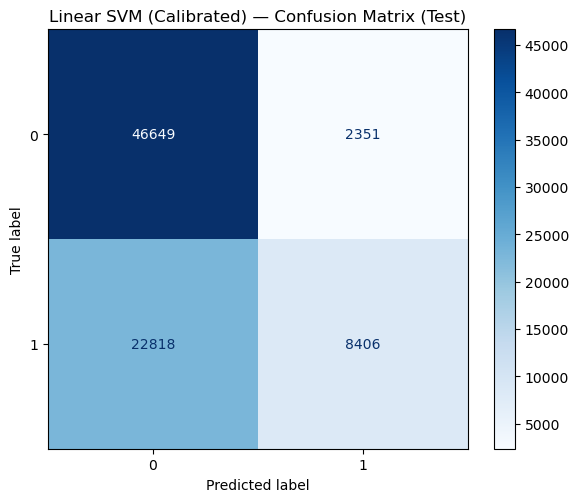

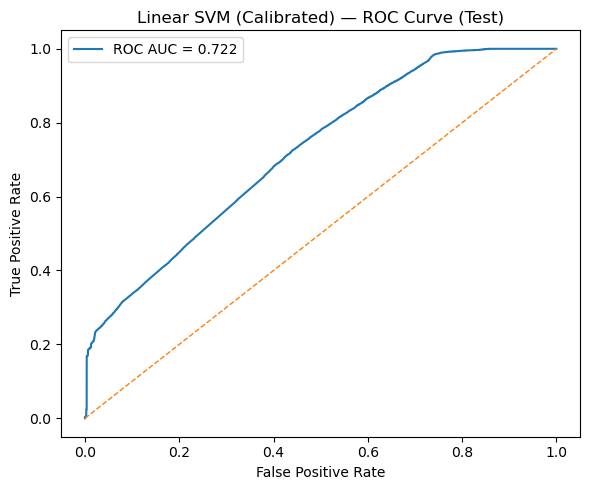

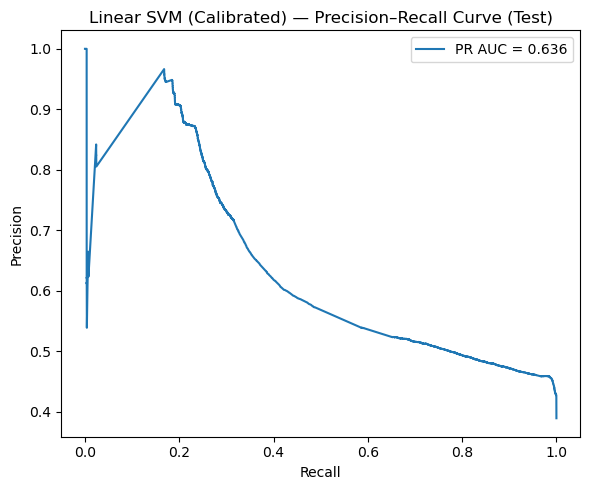


Saved model → artifacts/models/best_linear_svm_calibrated.joblib
Saved metrics → artifacts/metrics/svm_calibrated_metrics.json


In [22]:
# ==== Model 3: Linear SVM (LinearSVC + calibrated probabilities), one-hot sparse ====
import numpy as np
import json, joblib
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, precision_recall_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 0) Light CV for tuning
cv_light = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1) Linear-model-friendly preprocessing (sparse all the way)
numeric_tf_lin = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))
])
categorical_tf_lin = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

preprocess_linear = ColumnTransformer(
    transformers=[
        ("num", numeric_tf_lin, numeric_cols),
        ("cat", categorical_tf_lin, categorical_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

# 2) Base linear SVM + calibration (API change: estimator=, not base_estimator=)
base_svm = LinearSVC(
    random_state=42,
    loss="squared_hinge",
    max_iter=5000,
    class_weight="balanced"
)

calibrated_svm = CalibratedClassifierCV(
    estimator=base_svm,   # <-- updated name
    cv=3,
    method="sigmoid"
)

svm_pipe = Pipeline(steps=[("prep", preprocess_linear), ("clf", calibrated_svm)])

# 3) Compact grid (API change: clf__estimator__C)
svm_param_grid = {
    "clf__estimator__C": [0.1, 1.0, 10.0]
}

svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=svm_param_grid,
    scoring="f1_macro",
    cv=cv_light,
    n_jobs=1,
    refit=True,
    verbose=1
)

# 4) Fit
svm_grid.fit(X_train, y_train)

print("\nBest params:", svm_grid.best_params_)
print("Best CV macro-F1 (3-fold):", f"{svm_grid.best_score_:.4f}")

# 5) Evaluate
best_svm = svm_grid.best_estimator_
y_pred = best_svm.predict(X_test)

# CalibratedClassifierCV provides predict_proba
y_proba = best_svm.predict_proba(X_test)[:, 1]

metrics = compute_binary_metrics(y_test, y_pred, y_proba)
print("\n=== Test metrics (Linear SVM, calibrated) ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# 6) Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title("Linear SVM (Calibrated) — Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 7) ROC & PR
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Linear SVM (Calibrated) — ROC Curve (Test)")
plt.legend(); plt.tight_layout(); plt.show()

prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec, prec)
plt.figure(figsize=(6, 5))
plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Linear SVM (Calibrated) — Precision–Recall Curve (Test)")
plt.legend(); plt.tight_layout(); plt.show()

# 8) Save artefacts
MODELS = Path("artifacts/models"); MODELS.mkdir(parents=True, exist_ok=True)
METRICS = Path("artifacts/metrics"); METRICS.mkdir(parents=True, exist_ok=True)

joblib.dump(best_svm, MODELS / "best_linear_svm_calibrated.joblib")
with open(METRICS / "svm_calibrated_metrics.json", "w") as f:
    json.dump(
        {
            "best_params": svm_grid.best_params_,
            "cv_macro_f1_3fold": float(svm_grid.best_score_),
            "test_metrics": {k: float(v) for k, v in metrics.items()},
        },
        f,
        indent=2,
    )

print("\nSaved model → artifacts/models/best_linear_svm_calibrated.joblib")
print("Saved metrics → artifacts/metrics/svm_calibrated_metrics.json")
